In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

In [2]:
def load_data (real_path, fake_path):

    #Load real and fake headlines
    with open(real_path, 'r', encoding='utf-8') as f:
        real_headlines = f.readlines()
    with open(fake_path, 'r', encoding='utf-8') as f:
        fake_headlines = f.readlines()

    #Label Data 
    real_lables = [1] * len(real_headlines)
    fake_lables = [0] * len(fake_headlines)

    #Combine and shuffle data
    headlines = real_headlines + fake_headlines
    labels = real_lables + fake_lables 

    #Vectorize the text 
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(headlines)

    #Split into training, validation, and test sets

    X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size= 0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test, vectorizer


In [3]:
def select_model(X_train, y_train, X_val, y_val):
    depths = [3,5,10,15,20]
    validation_accuracies = []
    best_model = None 
    best_depth = None 
    best_accuracy = 0 

    for depth in depths: 
        #Train decision tree
        clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
        clf.fit(X_train, y_train)

        #Validate Model 
        y_val_pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        validation_accuracies.append(accuracy)

        #Update the best model 
        if accuracy > best_accuracy:
            best_model = clf
            best_depth = depth
            best_accuracy = accuracy

    plt.figure()
    plt.plot(depths, validation_accuracies, marker='o')
    plt.title("Validation Accuracy vs Max Depth")
    plt.xlabel("Max Depth")
    plt.ylabel("Validation Accuracy")
    plt.show()

    print(f"Best max_depth: {best_depth}, Validation Accuracy: {best_accuracy}")
    return best_model, best_depth

In [4]:
def test_model(best_model, X_test, y_test):
    #Test the best model 

    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy}")
    return test_accuracy

def visualize_tree(best_model, vectorizer): 
    #Extract the first two layers of the tree
    tree_rules = export_text(best_model, feature_names=vectorizer.get_feature_names_out(),max_depth=2)
    print("Tree Visualization (First Two Layers): ")
    print(tree_rules)

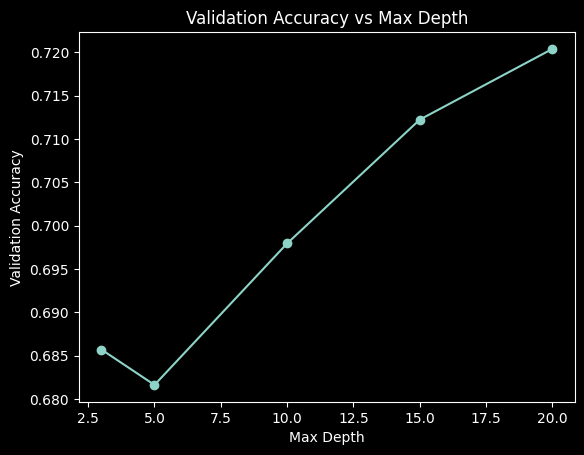

Best max_depth: 20, Validation Accuracy: 0.7204081632653061
Test Accuracy: 0.736734693877551
Tree Visualization (First Two Layers): 
|--- the <= 0.50
|   |--- hillary <= 0.50
|   |   |--- donald <= 0.50
|   |   |   |--- truncated branch of depth 18
|   |   |--- donald >  0.50
|   |   |   |--- truncated branch of depth 18
|   |--- hillary >  0.50
|   |   |--- clinton <= 0.50
|   |   |   |--- class: 0
|   |   |--- clinton >  0.50
|   |   |   |--- truncated branch of depth 13
|--- the >  0.50
|   |--- trumps <= 0.50
|   |   |--- donald <= 0.50
|   |   |   |--- truncated branch of depth 18
|   |   |--- donald >  0.50
|   |   |   |--- truncated branch of depth 18
|   |--- trumps >  0.50
|   |   |--- market <= 0.50
|   |   |   |--- class: 1
|   |   |--- market >  0.50
|   |   |   |--- class: 0



In [5]:
if __name__ == "__main__":
    real_path = r"Decision-Tree-Dataset/real.txt"
    fake_path = r"Decision-Tree-Dataset/fake.txt"
    # Load data
    X_train, X_val, X_test, y_train, y_val, y_test, vectorizer = load_data(real_path, fake_path)

    # Select model
    best_model, best_depth = select_model(X_train, y_train, X_val, y_val)

    # Test model
    test_accuracy = test_model(best_model, X_test, y_test)

    # Visualize tree
    visualize_tree(best_model, vectorizer)